In [12]:
import scanpy as sc
import scanpy.external as sce
import sys
sys.path.append('/home/anne/Documents/featurecloud/pca/federated_dp_pca')
import python.PCA.horizontal as h
import python.PCA.shared_functions as sh
import os.path as op
import os
import python.PCA.horizontal.horizontal_pca_benchmark as hb
import seaborn
import python.PCA.horizontal.horizontal_pca_power_iteration as h
import python.PCA.horizontal.balcan as b
import python.PCA.horizontal.bai as bai
import python.PCA.horizontal.proxy_covariance as proxy
import python.PCA.vertical.simulate_federated_vertically_partionned_pca as vertical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as la

import python.PCA.comparison as co

In [37]:
adata = sc.datasets.pbmc3k()
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, n_comps =10)

In [38]:
adata.obs['batch'] = 1350*['a'] + 1350*['b']

In [39]:
sce.pp.scanorama_integrate(adata, 'batch')

[[0.         0.98962963]
 [0.         0.        ]]
Processing datasets a <=> b


... storing 'batch' as categorical


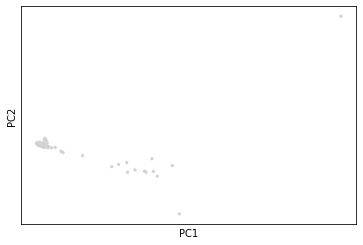

In [40]:
sc.pl.pca(adata)

In [41]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)

In [42]:
sc.tl.umap(adata)

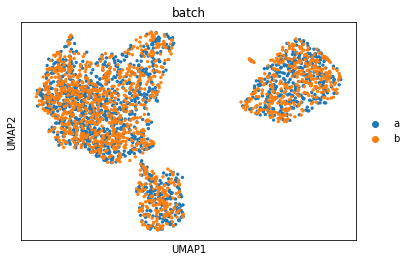

In [43]:
sc.pl.umap(adata, color='batch')

In [28]:
adata = sc.datasets.pbmc3k()
sc.pp.recipe_zheng17(adata)
# simulate federated approximate PCA
k = 10
data_list, r = sh.partition_data_horizontally(adata.X, splits=5, equal=True, randomize=False)
xx, ee = b.simulate_federated_horizontal_pca(data_list, k)
proj = np.dot(adata.X, xx)
adata.obsm['X_pca'] = proj
adata.varm['PCs'] = xx
adata.obs['batch'] = 1350*['a'] + 1350*['b']

In [29]:
sce.pp.scanorama_integrate(adata, 'batch')

[[0.         0.98814815]
 [0.         0.        ]]
Processing datasets a <=> b


In [31]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)

In [32]:
sc.tl.umap(adata)

... storing 'batch' as categorical


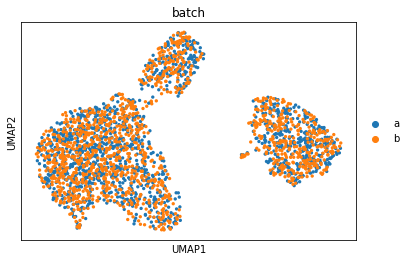

In [33]:
sc.pl.umap(adata, color='batch')